# Soliton equation

## imports

In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## initialization

In [3]:
COURANT = 0.1

X_max = 5
T_max = 0.01
X_min = T_min = 0

NUMBER_X = 300
#NUMBER_T = int((T_max - T_min) * NUMBER_X / COURANT / (X_max - X_min)) * 10
NUMBER_T = 10000

In [4]:
KAPPA = 10
PHI = 0.4

In [5]:
X_RANGE = np.linspace(X_min, X_max, NUMBER_X)
T_RANGE = np.linspace(T_min, T_max, NUMBER_T)

X_STEP = X_RANGE[1] - X_RANGE[0]
T_STEP = T_RANGE[1] - T_RANGE[0]

In [6]:
# exact solution
exact = lambda x, t: 2 * (KAPPA ** 2) / np.power(np.cosh(KAPPA * (x - PHI) - 4 * (KAPPA ** 3) * t), 2)

initial   = lambda x: exact(x, 0)

In [7]:
X, T = np.meshgrid(X_RANGE, T_RANGE, indexing='ij')
U = np.zeros_like(X)

# Boundary / initial conditions

U[:, 0] = initial(X[:, 0])

In [8]:
def calculate(U):
    
    #calculate second time layer
    for n in range(0,  NUMBER_X - 2):
        U[n, 1] = U[n,   0] - T_STEP / X_STEP * \
                 (U[n+1, 0] + U[n, 0]   + U[n-1, 0]) * \
                 (U[n+1, 0] - U[n-1, 0]) - T_STEP/2 / (X_STEP ** 3) * \
                 (U[n+2, 0] - 2 * U[n+1, 0] + 2 * U[n-1, 0] - U[n-2, 0])
        
    #calculate the rest time layers
    for m in tqdm(range(1, NUMBER_T-1)):
        for n in range(0, NUMBER_X-2):
            U[n, m+1] = U[n, m-1] - 2 * T_STEP / X_STEP * \
                       (U[n+1, m] + U[n, m] + U[n-1, m]) * \
                       (U[n+1, m] - U[n-1, m]) - T_STEP / (X_STEP ** 3) * \
                       (U[n+2, m] - 2 * U[n+1, m] + 2 * U[n-1, m] - U[n-2, m])
            
    return U

## main procedure

In [9]:
U_single = calculate(U)

100%|██████████| 9998/9998 [00:09<00:00, 1019.77it/s]


## plot

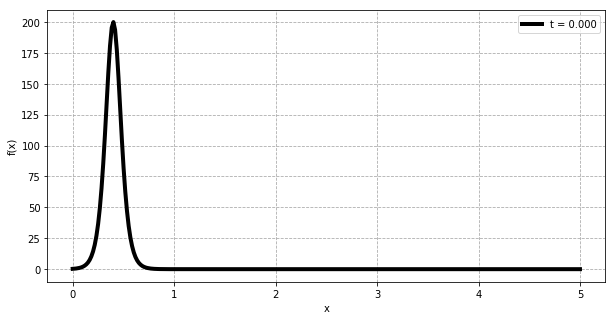

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

l1, = ax.plot(X_RANGE, U[:,-1], lw=4, color='black', label=None)

ax.grid(c='#aaaaaa', ls='--')

ax.set_ylabel("f(x)")
ax.set_xlabel("x")

def animate(i):
    l1.set_data(X_RANGE, U[:, i])
    l1.set_label('t = ' + '%.3f' %(i * T_STEP))

    legend = plt.legend(loc='upper right')
    return l1, legend

ani = FuncAnimation(fig, animate, frames=np.linspace(0, NUMBER_T - 2, 50).astype(int), interval=50)

#ani.save("solution.mp4")
HTML(ani.to_jshtml())

## create two solitones

In [11]:
U_1 = np.zeros_like(X)

U_1[:, 0] = initial(X[:, 0])

In [12]:
# parameters of second soliton

KAPPA = KAPPA - 2
PHI = 1.5

In [13]:
U_2 = np.zeros_like(X)

U_2[:, 0] = initial(X[:, 0])

In [14]:
U_double = calculate(U_1 + U_2)

100%|██████████| 9998/9998 [00:09<00:00, 1015.68it/s]


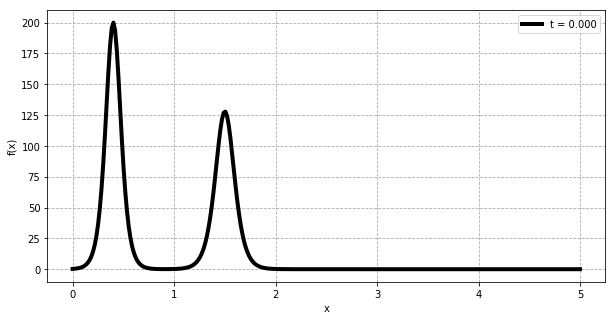

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

l1, = ax.plot(X_RANGE, U_double[:,-1], lw=4, color='black', label=None)

ax.grid(c='#aaaaaa', ls='--')

ax.set_ylabel("f(x)")
ax.set_xlabel("x")

def animate(i):
    l1.set_data(X_RANGE, U_double[:, i])
    l1.set_label('t = ' + '%.3f' %(i * T_STEP))

    legend = plt.legend(loc='upper right')
    return l1, legend

ani = FuncAnimation(fig, animate, frames=np.linspace(0, NUMBER_T - 2, 50).astype(int), interval=50)

#ani.save("solution.mp4")
HTML(ani.to_jshtml())